In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
dataset.count()

YearsExperience    30
Salary             30
dtype: int64

In [8]:
X = dataset.iloc[:, :1].values
y = dataset.iloc[:, 1].values

In [9]:
X.shape, y.shape

((30, 1), (30,))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linear = LinearRegression()

In [14]:
linear.fit(X_train, y_train)

/Users/swapnilpote/.virtualenvs/py3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_test_pred = linear.predict(X_test)

In [16]:
linear.coef_

array([9377.71581254])

In [17]:
linear.intercept_

26562.399292606955

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
mean_absolute_error(y_test, y_test_pred)

3863.2930990734653

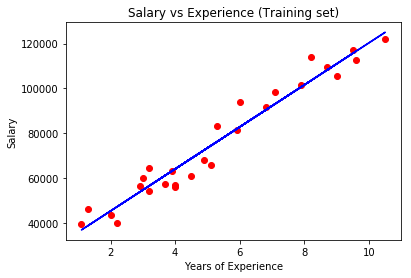

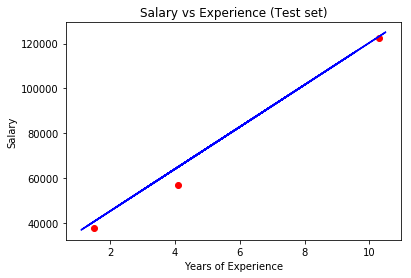

In [20]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linear.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, linear.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Using Gradient Descent

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd_linear = SGDRegressor(max_iter = 1000)

In [23]:
sgd_linear.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [24]:
y_test_pred = sgd_linear.predict(X_test)

In [25]:
sgd_linear.coef_

array([9378.98644591])

In [26]:
sgd_linear.intercept_

array([26482.94408418])

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
mean_absolute_error(y_test, y_test_pred)

3790.572247512881